In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib as plt

from matplotlib import style
style.use('fivethirtyeight')

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# To display all the columns from Measurement table

[column.key for column in Measurement.__table__.columns]

['id', 'station', 'date', 'prcp', 'tobs']

In [4]:
# To display all the columns from Station table

[column.key for column in Station.__table__.columns]

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

results = session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
#print(results)

In [7]:
#  3. Convert the June temperatures to a list.
june_result = [list(i) for i in results]
#print(june_result)

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_result, columns=['date','temperature'])
df.set_index(df['date'], inplace= True) # doesnt create a new DF but sets the index as date in the existing df
print(df.to_string(index = False))

      date  temperature
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

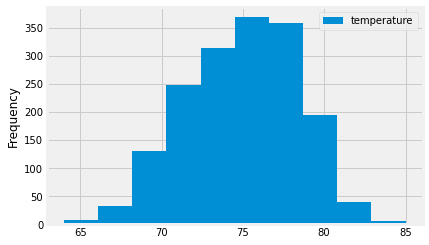

In [10]:
df.plot(kind = 'hist')

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_2 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [12]:
# 7. Convert the December temperatures to a list.
dec_result = [list(i) for i in results_2]
#dec_result

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(dec_result, columns=['date','temperature'])
df_dec.set_index(df_dec['date'], inplace= True) # doesnt create a new DF but sets the index as date in the existing df
print(df_dec.to_string(index = False))

      date  temperature
2010-12-01         76.0
2010-12-03         74.0
2010-12-04         74.0
2010-12-06         64.0
2010-12-07         64.0
2010-12-08         67.0
2010-12-09         77.0
2010-12-10         66.0
2010-12-11         69.0
2010-12-12         68.0
2010-12-13         68.0
2010-12-14         71.0
2010-12-15         74.0
2010-12-16         67.0
2010-12-17         66.0
2010-12-18         69.0
2010-12-19         71.0
2010-12-23         70.0
2010-12-24         70.0
2010-12-26         74.0
2010-12-27         74.0
2010-12-28         71.0
2010-12-29         75.0
2010-12-30         75.0
2010-12-31         72.0
2011-12-01         69.0
2011-12-02         68.0
2011-12-03         73.0
2011-12-04         74.0
2011-12-05         73.0
2011-12-06         73.0
2011-12-07         73.0
2011-12-08         73.0
2011-12-09         71.0
2011-12-10         73.0
2011-12-11         73.0
2011-12-12         77.0
2011-12-13         72.0
2011-12-14         71.0
2011-12-15         73.0
2011-12-16      

In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

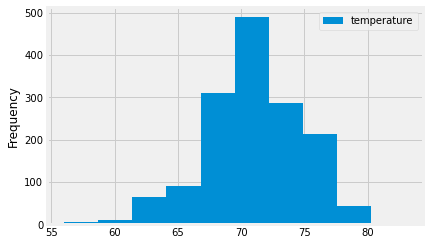

In [15]:
df_dec.plot(kind = 'hist')

# plt.style.use('fivethirtyeight')

# Additional Query for precepitation for the Month of June and December

In [23]:
# Precipitation analysis for the month of June
results_1_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)== 6).all()
june_result_prcp = [list(i) for i in results_1_prcp]
df_june_prcp = pd.DataFrame(june_result_prcp, columns=['date','precipitation'])
df_june_prcp.set_index(df_june_prcp['date'], inplace= True) # doesnt create a new DF but sets the index as date in the existing df
#print(df_dec_prcp.to_string(index = False))
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_june_prcp.describe()


,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [32]:
# df_june_prcp.plot()

In [26]:
# Precipitation analysis for the month of December
results_2_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_result_prcp = [list(i) for i in results_2_prcp]
df_dec_prcp = pd.DataFrame(dec_result_prcp, columns=['date','precipitation'])
df_dec_prcp.set_index(df_dec_prcp['date'], inplace= True) # doesnt create a new DF but sets the index as date in the existing df
#print(df_dec_prcp.to_string(index = False))
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec_prcp.describe()


,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [33]:
# df_dec_prcp.plot()